# Time series prediction model using LSTMs and tensorflow 

In [57]:
### Imports :
from __future__ import print_function

# Tensorflow libraries :
import tensorflow as tf
from tensorflow.contrib import rnn

# Numpy libraries :
import numpy as np
import numpy.random as npr
import pandas as pd
from tslearn.utils import to_time_series
import matplotlib.pyplot as plt

# import lstm functions :
from LSTM_models.py import Multilayer_LSTM

ModuleNotFoundError: No module named 'LSTM_models'

## 1._ Construct a TimeSeries :

We will construct a time series using logarithm and sinus functions? we will also add noise to our TS.

Task : with access to 150 points we want the next 10 points with a lag of 20 :

    Input  = x_i, ... x_(i+149)
    Output = x_(i+169), ... x_(i+189)

In [46]:
## First get the dataset : using sinus function
def Construct_TS(noise_level=0.3, sin_level=3, log_smo=0.1):
    
    data = [np.log(log_smo*x) + sin_level*np.sin(x) + noise_level*npr.randn() for x in np.arange(10,200, 0.1)]
    data_len = len(data)
    print('Time series shape is : ', data_len)
    
    plt.plot(np.arange(10,200, 0.1), data)
    plt.show()
    
    return data, data_len

Time series shape is :  1900


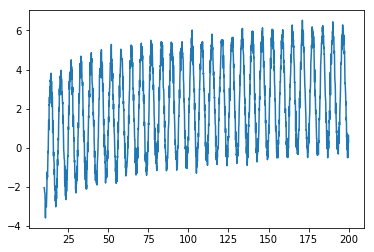

1900


In [47]:
data, data_len = Construct_TS(noise_level=0.3)
print(data_len)

In [50]:
def GetDataset(input_num=150, output_num=10, lag= 20,
               noise_level=0.3, sin_level=3, log_smo=0.1):
    
    
    #Get the timeseries :
    TS, TS_len = Construct_TS(noise_level, sin_level, log_smo)
    
    # Get the dataset (input, output) :
    Dataset = []
    for i in range(TS_len-180):
        x = TS[i:i+input_num] # Get the input
        y = TS[i+input_num+lag:i+input_num+lag+output_num] # Get the output
        Dataset.append([x,y]) # fill the dataset
    
    Dataset = np.array(Dataset)
    Dataset_shape = np.shape(Dataset)
    print('Dataset shape : ', Dataset_shape)
    return Dataset, Dataset_shape
        

Time series shape is :  1900


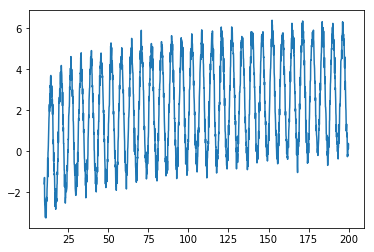

Dataset shape :  (1720, 2)


In [51]:
D = GetDataset()

## 2._ Prediction task :

We will use many LSTm models, varying the she architecture, the number of layers, and the dimension of the hidden layers.

The lstm function is uploadedd from LSTM_models in the same folder

The best model will be saved and we will construct a Python class to use it for prediction.

2
